In [1]:
# pip install git+git://github.com/stared/keras-sequential-ascii.git

import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import Adam
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
from keras.callbacks import TensorBoard
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

/home/valentin/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Declare variables
 
batch_size = 256
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 10 # repeat 100 times

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)

In [4]:
x_train.shape

(50000, 3, 32, 32)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

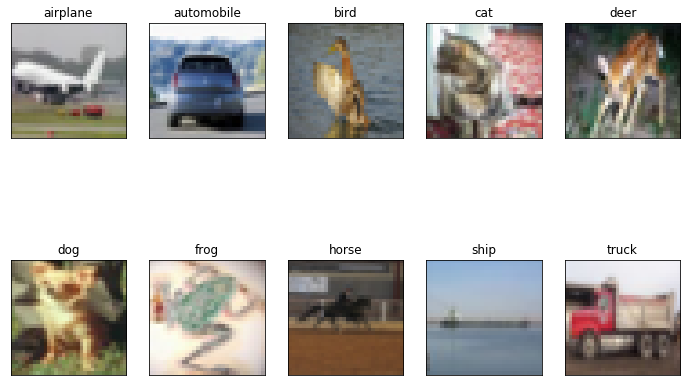

In [6]:
# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(12,8))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [7]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [22]:
def base_model():
 
    model = Sequential()
#     model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
#     model.add(Activation('relu'))
#     model.add(Conv2D(32,(3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
 
#     model.add(Conv2D(64, (3, 3), padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(64, (3,3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
 
#     model.add(Flatten())
#     model.add(Dense(512))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.5))
    
#     model.add(Dense(num_classes))
#     model.add(Activation('softmax'))


    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Flatten())
    model.add(Dense(256, input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    
    sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
 
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# cnn_n = base_model()
# cnn_n.summary()
 
# Fit model
 
# cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

In [23]:
cnn_n = base_model()

ValueError: Dimensions must be equal, but are 3 and 256 for 'dense_4/BiasAdd' (op: 'BiasAdd') with input shapes: [?,3,32,256], [256].

In [17]:
cnn_n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 32, 32)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33554944  
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
__________

In [18]:

sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------     18496     0.1%
                relu   #####     64   32   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       65536
               Dense   XXXXX -------------------  33554944    99.9%
                relu   #####         512
               Dense   XXXXX -------------------      5130     0.0%
             softmax   #####          10


In [26]:
x_train.shape[1:]

(3, 32, 32)

In [8]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

import time
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
num_classes = 10

In [10]:
x_train[2,::].shape

(32, 32, 3)

In [ ]:
np.random.randint(features_idx.shape[0])

In [ ]:

    im = np.transpose(features_idx[img_num,::],(1,2,0))

In [14]:
image = x_train[0]

In [16]:
image[0].shape

(32, 32)

In [17]:
image = (image[0] + image[1] + image[2]) / 3

In [18]:
image.shape


(32, 32)

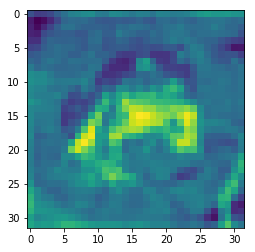

In [20]:
plt.imshow(image)
plt.show()

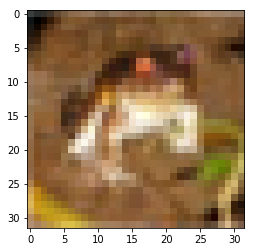

In [23]:
plt.imshow(np.transpose(x_train[0],(1,2,0)))
plt.show()

In [24]:
plt.imshow(image)
plt.imshow(np.transpose(x_train[0],(1,2,0)))

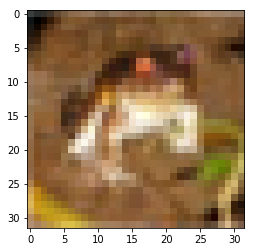

In [25]:
plt.show()

In [31]:
x_train[:,2].shape

(50000, 32, 32)

In [9]:
gray_x_train = (x_train[:,0] + x_train[:,1] + x_train[:,2]) / 3

In [33]:
%matplotlib inline

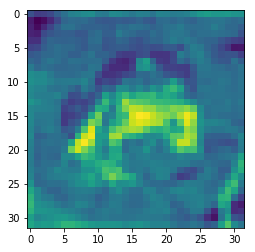

In [34]:
plt.imshow(gray_x_train[0])

In [10]:
gray_x_test = (x_test[:,0] + x_test[:,1] + x_test[:,2]) / 3

In [37]:
gray_x_train.shape

(50000, 32, 32)

In [11]:
gray_x_train = gray_x_train.reshape(50000, 1024)
gray_x_test = gray_x_test.reshape(10000, 1024)



In [12]:
def model_1():
    model = Sequential()
    
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

In [13]:
model = model_1()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________


In [15]:
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        1024
               Dense   XXXXX -------------------    262400    88.5%
                relu   #####         256
               Dense   XXXXX -------------------     32896    11.1%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.4%
             softmax   #####          10


In [54]:
batch_size = 256

In [29]:
epochs = 100

In [30]:
y_train.shape

(50000, 10)

In [31]:
history = model.fit(gray_x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(gray_x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/cifar')])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 34us/step - loss: 0.1418 - acc: 0.9513 - val_loss: 6.9799 - val_acc: 0.3855
Epoch 2/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.1031 - acc: 0.9638 - val_loss: 7.0177 - val_acc: 0.3814
Epoch 3/100
50000/50000 [==============================] - ETA: 0s - loss: 0.0630 - acc: 0.978 - 1s 22us/step - loss: 0.0632 - acc: 0.9787 - val_loss: 6.9794 - val_acc: 0.3845
Epoch 4/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.0485 - acc: 0.9849 - val_loss: 7.0290 - val_acc: 0.3853
Epoch 5/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.0349 - acc: 0.9896 - val_loss: 6.9860 - val_acc: 0.3872
Epoch 6/100
50000/50000 [==============================] - 1s 20us/step - loss: 0.1619 - acc: 0.9470 - val_loss: 7.0328 - val_acc: 0.3770
Epoch 7/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.24

In [32]:
model.save('cifar_v1_100ep_256bs.h5')

In [33]:
score = model.evaluate(gray_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.021105867004395
Test accuracy: 0.3869


In [34]:
from keras.models import load_model

model1000 = load_model('cifar_v1_1000ep.h5')

In [35]:
score = model1000.evaluate(gray_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.952432276916504
Test accuracy: 0.3827


In [36]:
history


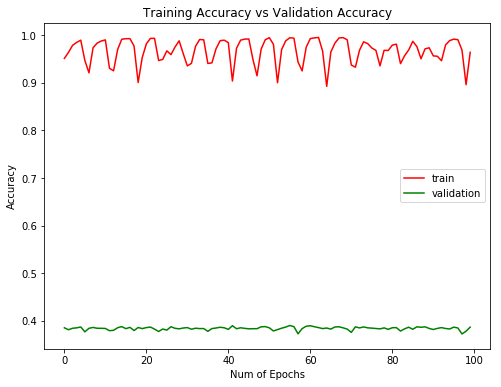

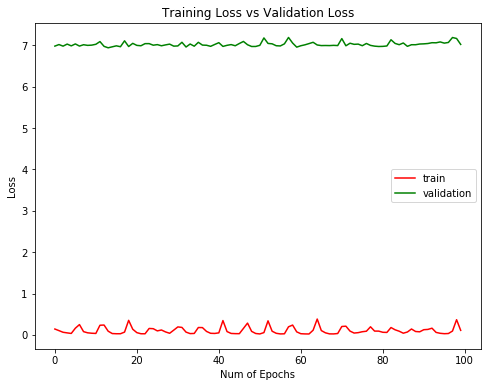

In [45]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
# plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
# plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [38]:
history2 = model.fit(gray_x_train, y_train,
                batch_size=32,
                epochs=10,
                verbose=1,
                validation_data=(gray_x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/cifar')])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 158us/step - loss: 10.8594 - acc: 0.2537 - val_loss: 7.1563 - val_acc: 0.2788
Epoch 2/10
50000/50000 [==============================] - 7s 143us/step - loss: 3.2293 - acc: 0.2450 - val_loss: 2.3269 - val_acc: 0.2285
Epoch 3/10
50000/50000 [==============================] - 7s 144us/step - loss: 2.1582 - acc: 0.2474 - val_loss: 2.1453 - val_acc: 0.2536
Epoch 4/10
50000/50000 [==============================] - 7s 144us/step - loss: 2.0526 - acc: 0.2722 - val_loss: 2.0690 - val_acc: 0.2705
Epoch 5/10
50000/50000 [==============================] - 7s 135us/step - loss: 1.9975 - acc: 0.2869 - val_loss: 2.0397 - val_acc: 0.2868
Epoch 6/10
50000/50000 [==============================] - 7s 138us/step - loss: 1.9549 - acc: 0.3032 - val_loss: 1.9679 - val_acc: 0.3102
Epoch 7/10
50000/50000 [==============================] - 7s 135us/step - loss: 1.9189 - acc: 0.3130 - val_loss: 1.9533 -

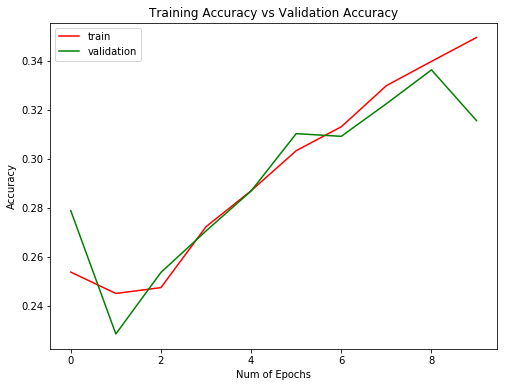

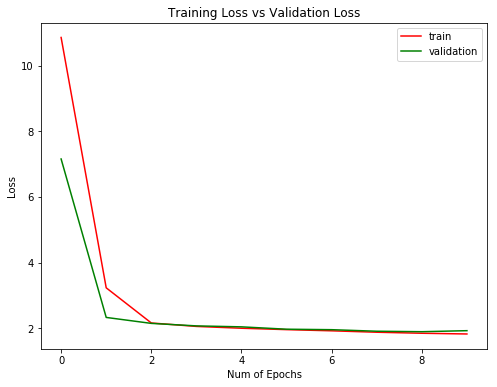

In [47]:
plt.figure(0)
plt.plot(history2.history['acc'],'r')
plt.plot(history2.history['val_acc'],'g')
# plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'g')
# plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [42]:
score = model.evaluate(gray_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9232086498260499
Test accuracy: 0.3155


In [43]:
history3 = model.fit(gray_x_train, y_train,
                batch_size=64,
                epochs=20,
                verbose=1,b
                validation_data=(gray_x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/cifar')])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 73us/step - loss: 1.7712 - acc: 0.3670 - val_loss: 1.8601 - val_acc: 0.3518
Epoch 2/20
50000/50000 [==============================] - 4s 71us/step - loss: 1.7575 - acc: 0.3753 - val_loss: 1.8843 - val_acc: 0.3444
Epoch 3/20
50000/50000 [==============================] - 4s 70us/step - loss: 1.7486 - acc: 0.3755 - val_loss: 1.8772 - val_acc: 0.3482
Epoch 4/20
50000/50000 [==============================] - 3s 65us/step - loss: 1.7381 - acc: 0.3795 - val_loss: 1.8639 - val_acc: 0.3528
Epoch 5/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.7304 - acc: 0.3822 - val_loss: 1.8723 - val_acc: 0.3536
Epoch 6/20
50000/50000 [==============================] - 3s 67us/step - loss: 1.7202 - acc: 0.3851 - val_loss: 1.8472 - val_acc: 0.3553
Epoch 7/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.7076 - acc: 0.3916 - val_loss: 1.8466 - val_acc

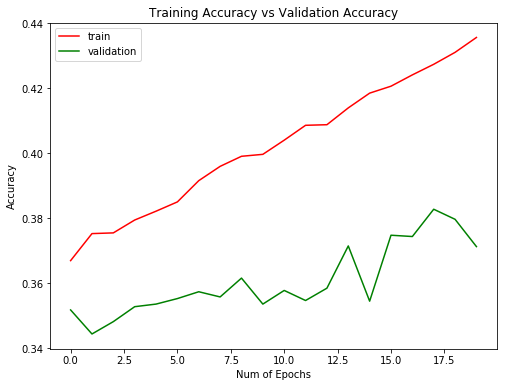

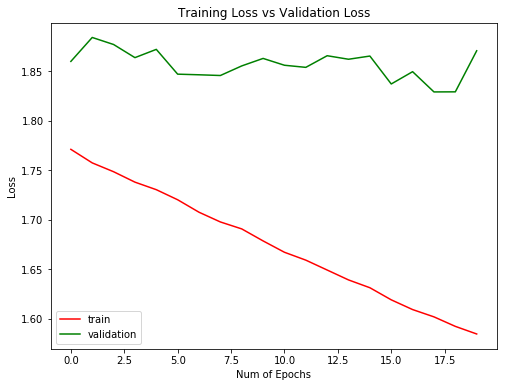

In [46]:
plt.figure(0)
plt.plot(history3.history['acc'],'r')
plt.plot(history3.history['val_acc'],'g')
# plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history3.history['loss'],'r')
plt.plot(history3.history['val_loss'],'g')
# plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [59]:
def model_2():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

In [50]:
model2 = model_2()
model2.summary()
sequential_model_to_ascii_printout(model2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 162,538
Trainable params: 162,538
Non-trainable params: 0
_________________________________________________________________
    

In [51]:
def train(model, batch_size, epochs):
    history = model.fit(gray_x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(gray_x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/cifar')])
    return history

In [52]:
history_2 = train(model2, 64, 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 82us/step - loss: 2.0599 - acc: 0.2465 - val_loss: 1.9649 - val_acc: 0.2979
Epoch 2/20
50000/50000 [==============================] - 4s 81us/step - loss: 1.9182 - acc: 0.3113 - val_loss: 1.8541 - val_acc: 0.3416
Epoch 3/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.8539 - acc: 0.3369 - val_loss: 1.8471 - val_acc: 0.3385
Epoch 4/20
50000/50000 [==============================] - 4s 84us/step - loss: 1.8084 - acc: 0.3529 - val_loss: 1.8286 - val_acc: 0.3537
Epoch 5/20
50000/50000 [==============================] - 4s 83us/step - loss: 1.7770 - acc: 0.3660 - val_loss: 1.7736 - val_acc: 0.3712
Epoch 6/20
50000/50000 [==============================] - 4s 82us/step - loss: 1.7414 - acc: 0.3765 - val_loss: 1.7299 - val_acc: 0.3863
Epoch 7/20
50000/50000 [==============================] - 4s 83us/step - loss: 1.7155 - acc: 0.3857 - val_loss: 1.7179 - val_acc

In [53]:
import seaborn as sns

sns.set()

def my_eval(model, history):
    score = model.evaluate(gray_x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])

    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])

    plt.show()

Test loss: 1.6554552413940429
Test accuracy: 0.4224


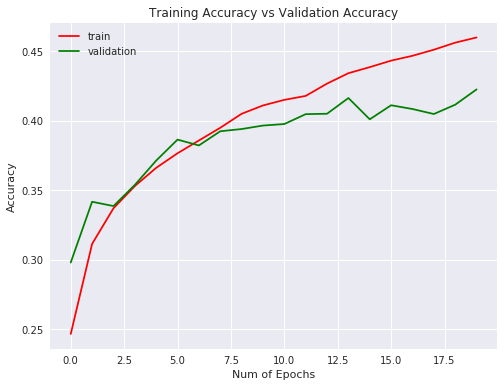

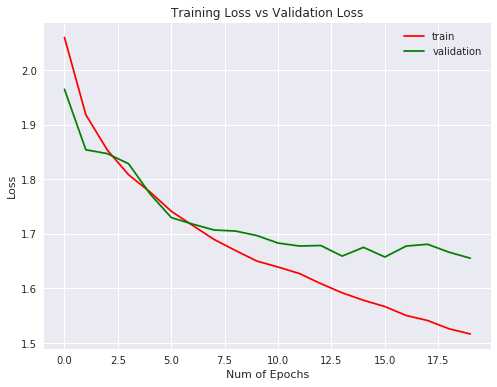

In [54]:
my_eval(model2, history_2)

In [60]:
def nn_all(model, batch_size=64, epochs=20, save=None):
    
    model.summary()
    sequential_model_to_ascii_printout(model)
    
    history = train(model, batch_size, epochs)
    
    my_eval(model, history)
    
    if(save != None):
        model.save(save)
    

In [63]:
def model_3():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 162,538
Trainable params: 162,538
Non-trainable params: 0
_________________________________________________________________
    

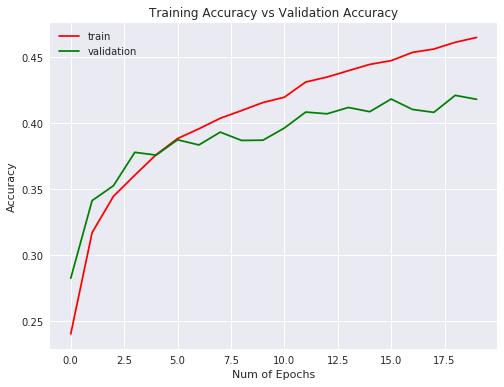

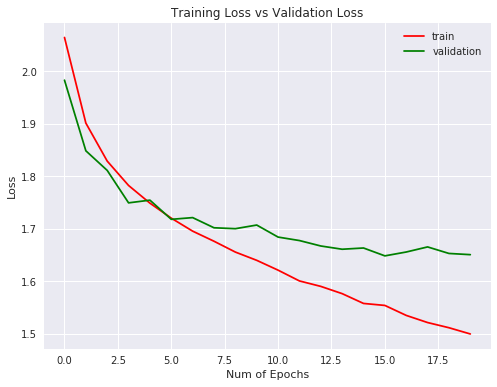

In [61]:
nn_all(model_2(), save='cifar_v2.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
__________

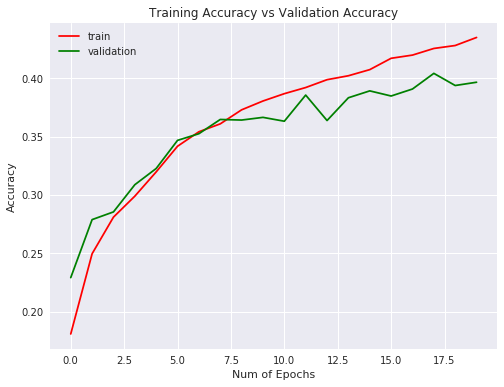

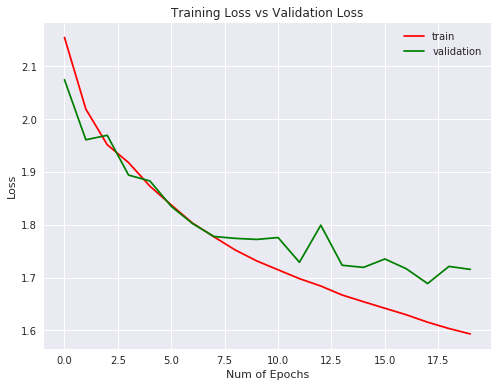

In [64]:
nn_all(model_3(), save='cifar_v3.h5')

In [65]:
def model_4():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

In [66]:
def model_5():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
__________

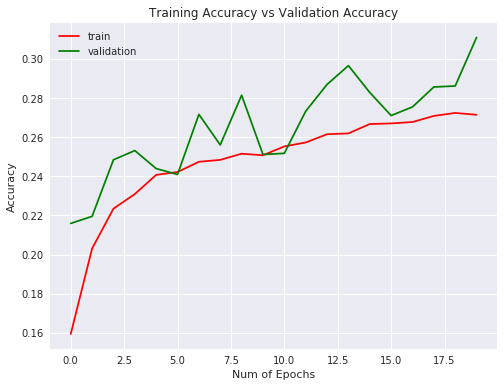

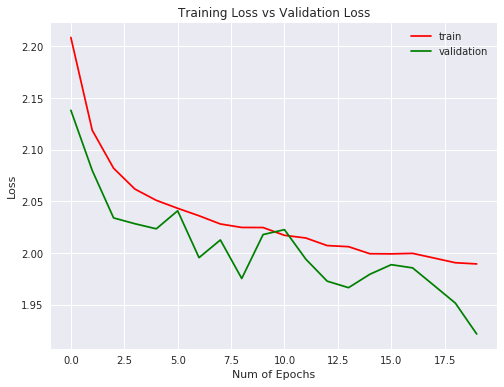

In [67]:
nn_all(model_4(), save='cifar_v4.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
__________

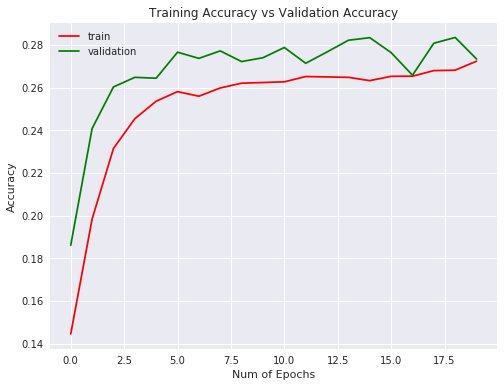

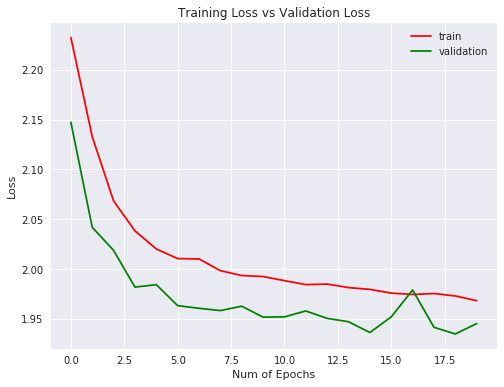

In [68]:
nn_all(model_5(), save='cifar_v5.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
__________

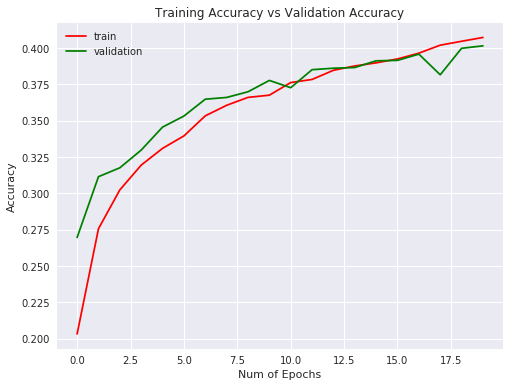

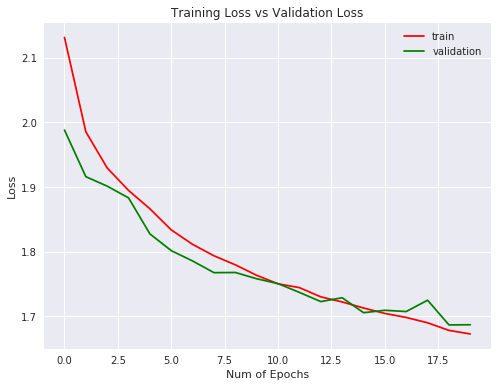

In [69]:
def model_6():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

nn_all(model_6())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_64 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 64)                2112      
__________

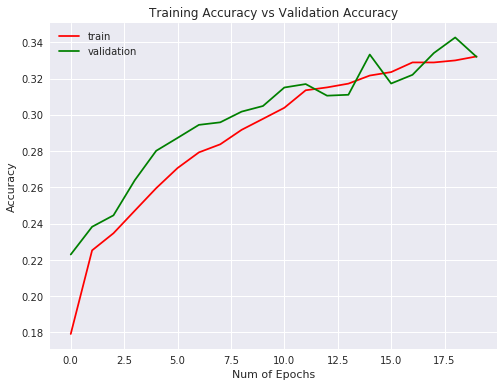

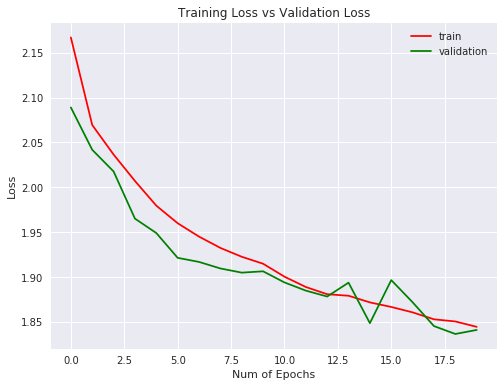

In [76]:
from keras.layers import MaxPooling1D

def model_7():
    model = Sequential()
    
    model.add(Dense(32, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

nn_all(model_7())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 32)                2080      
__________

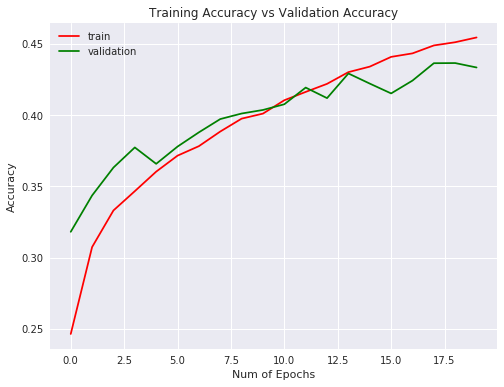

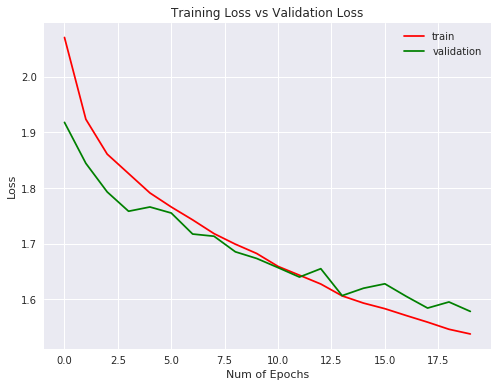

In [77]:
from keras.layers import MaxPooling1D

def model_7():
    model = Sequential()
    
    model.add(Dense(128, activation='elu', input_shape=(1024,)))
    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='elu'))
    model.add(Dense(64, activation='elu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

nn_all(model_7())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_85 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_87 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
__________

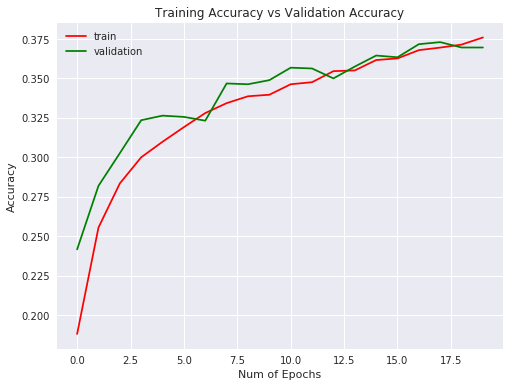

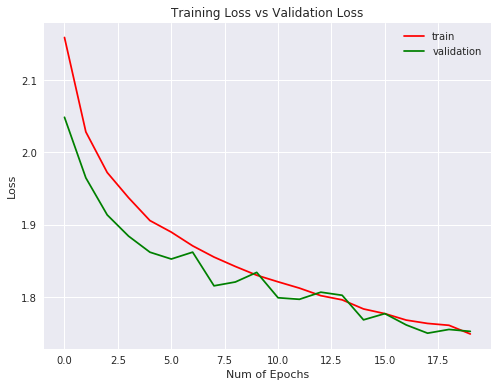

In [78]:


def model_7():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

nn_all(model_7())